## 1. Of cats and cookies
<p><a href="https://www.facebook.com/cookiecatsgame">Cookie Cats</a> is a hugely popular mobile puzzle game developed by <a href="http://tactile.dk">Tactile Entertainment</a>. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats. We're not kidding! Check out this short demo:</p>
<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="files/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>
<p>As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.</p>
<p><img src="files/img/cc_gates.png" alt=""></p>
<p>But where should the gates be placed? Initially the first gate was placed at level 30, but in this notebook we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention. But before we get to that, a key step before undertaking any analysis is understanding the data. So let's load it in and take a look!</p>

In [1]:
# Importing pandas
import pandas as pd
# Reading in the data
df = pd.read_csv('datasets/cookie_cats.csv')

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## 2. The AB-test data
<p>The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:</p>
<ul>
<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the group with the moved gate (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first 14 days after install.</li>
<li><code>retention_1</code> - did the player come back and play <strong>1 day</strong> after installing?</li>
<li><code>retention_7</code> - did the player come back and play <strong>7 days</strong> after installing?</li>
</ul>
<p>When a player installed the game, he or she was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>. As a sanity check, let's see if there are roughly the same number of players in each AB group. </p>

In [2]:
# Counting the number of players in each AB group.
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


## 3. The distribution of game rounds
<p><img src="files/img/mr_waffles_smiling.png" style="width:200px; float:left"> </p>
<p>It looks like there is roughly the same number of players in each group, nice!</p>
<p>The focus of this analysis will be on how the gate placement affects player retention, but just for fun: Let's plot the distribution of the number of game rounds players played during their first week playing the game.</p>

Text(0,0.5,'user_number')

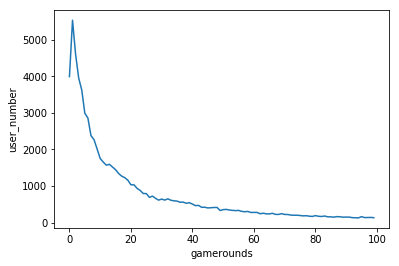

In [3]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot()
ax.set_xlabel("gamerounds")
ax.set_ylabel("user_number")

In [4]:
# number of players for each gamerounds
plot_df.head()

sum_gamerounds
0    3994
1    5538
2    4606
3    3958
4    3629
Name: userid, dtype: int64

## 4. Overall 1-day retention
<p>In the plot above we can see that some players install the game but then never play it (0 game rounds), some players just play a couple of game rounds in their first week, and some get really hooked!</p>
<p>What we want is for players to like the game and to get hooked. A common metric in the video gaming industry for how fun and engaging a game is <em>1-day retention</em>: The percentage of players that comes back and plays the game <em>one day</em> after they have installed it.  The higher 1-day retention is, the easier it is to retain players and build a large player base. </p>
<p>As a first step, let's look at what 1-day retention is overall.</p>

In [5]:
# The % of users that came back the day after they installed
df['retention_1'].sum()/df['retention_1'].count()

0.4452095044850259

In [6]:
# A second way to calculate the % of users that came back the day after they installed
df['retention_1'].mean()

0.4452095044850259

## 5. 1-day retention by AB-group
<p><img src="files/img/belle_cookie.png" style="width:200px; float:right"> </p>
<p>So, a little less than half of the players come back one day after installing the game. Now that we have a benchmark, let's look at how 1-day retention differs between the two AB-groups.</p>

In [7]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].sum()/df.groupby('version')['retention_1'].count()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [8]:
# A second way to calculate 1-day retention for each AB-group
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

## 6.0 Null Hypothesis Significance Testing (NHST)
Could this dfference in retension rate been caused by chance? We can make the null hypothesis as: there is no differece of the 1-day retension between gate_30 and gate_40. The test statistic we use is difference between gate_30 retension and gate_40 retension. A permutation test will be conducted to calculate the p-value. Let's check the statistic significance.

In [9]:
# calculate the observed 1-dasy retension for AB-group
observed_1_day_retention = df.groupby('version')['retention_1'].mean()
# gate_30 1-day retention
observed_gate_30_day_1_retention = observed_1_day_retention[0]
observed_gate_40_day_1_retention = observed_1_day_retention[1]
# calsulate the observed difference
observed_1_day_difference = observed_gate_30_day_1_retention - observed_gate_40_day_1_retention
print('The observed 1-day retentin difference between gate_30 and gate_40 is', '{}'.format(observed_1_day_difference))

The observed 1-day retentin difference between gate_30 and gate_40 is 0.005905169787341458


### Here we filter the DataFrame to get the gate_30 retention_1 array and gate_40 retention_1 array

In [10]:
# Filter the version column to extract gate_30 1-day retention
gate_30_retention_1 = df.retention_1[df.version == 'gate_30']
# Turn gate_30 1-day retention to numpy array
import numpy as np
gate_30_retention_1 = np.array(gate_30_retention_1)

# Filter the version column to extract gate_40 1-day retention
gate_40_retention_1 = df.retention_1[df.version == 'gate_40']
# Turn gate_40 1-day retention to numpy array
gate_40_retention_1 = np.array(gate_40_retention_1)

### Define a functin to calculate the difference of fraction, which is the test statistics, in this case, it is the difference of gate_30 1-day retention and gate_40 1-day retention

In [11]:
def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A)/len(data_A)
    frac_B = np.sum(data_B)/len(data_B)
    return frac_A - frac_B

### Define function to permutate sample from two data sets

In [12]:
def permutation_sample(data1, data2):
    """Generate a permutaion sample from two data sets"""
    
    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))
    
    # Permute the concantenated array: permuted_data
    permuted_data = np.random.permutation(data)
    
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[: len(data1)]
    perm_sample_2 = permuted_data[len(data1) :]
    
    return perm_sample_1, perm_sample_2

### Define function to generate multiple permutaion replicates

In [13]:
def draw_perm_reps(data1, data2, func, size=1):
    """Generate multiple permutation replicates"""
    
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    
    for i in range(size):
        # Generate permutaion sample
        perm_sample_1, perm_sample_2 = permutation_sample(data1, data2)
        
        # compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
    return perm_replicates

### Generate permutaion replicates for gate_30_retention_1 and gate_40_retention_1

In [14]:
# Generate 100000 permutation replicates
perm_replicates_retention_1 = draw_perm_reps(gate_30_retention_1, gate_40_retention_1, diff_frac, size=100000)

### Plot the ECDF of the permutation replicates

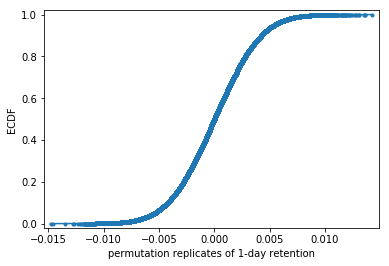

In [15]:
# Define a function to compute ECDF for a one-dimensional array
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    
    # Number of data points
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    
    return x, y

import matplotlib.pyplot as plt

# Compute and plot ECDF from permutation replicates
x, y = ecdf(perm_replicates_retention_1)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('permutation replicates of 1-day retention')
_ = plt.ylabel('ECDF')

# Show plot
plt.show()

### Plot a histogram of all the permutaion replicates

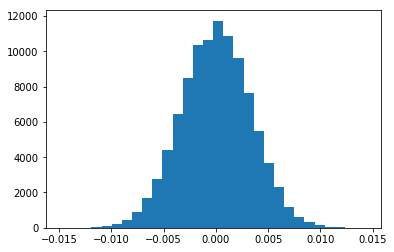

In [16]:
_ = plt.hist(perm_replicates_retention_1, bins=30)

### Calculate p value

In [17]:
p_value_retention_1 = np.sum(perm_replicates_retention_1 >= observed_1_day_difference) / 100000
print(p_value_retention_1)

0.03749


### Conclusion
The p-value is 0.03737 which is relative small, which means there are only 3.7% of the 100000 replicates ahs a result as extreme as the actual difference between the gate_30 1-day retention and gate_40 1-day retention. This suggests gate_30  1-day retention is statistically better than gate_40 1-day retention, and the observed difference is not by chance.

## 6. Should we be confident in the difference?
<p>It appears that there was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control when it was at level 30 (44.8%). It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 40 will be worse in the future?</p>
<p>There are a couple of ways we can get at the certainty of these retention numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.</p>

version       gate_30   gate_40
retention_1  0.447064  0.439788
retention_1  0.446697  0.441407
retention_1  0.447180  0.438997
retention_1  0.445104  0.444193
retention_1  0.447355  0.441709


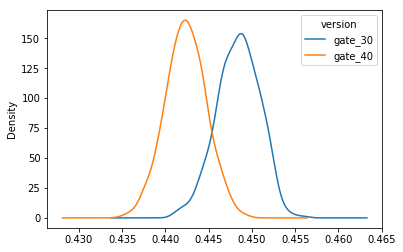

In [18]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
print(boot_1d.head())
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot.kde()

## 7. Zooming in on the difference
<p>These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. Just eyeballing this plot, we can see that there seems to be some evidence of a difference, albeit small. Let's zoom in on the difference in 1-day retention</p>
<p>(<em>Note that in this notebook we have limited the number of bootstrap replication to 500 to keep the calculations quick. In "production" we would likely increase this to a much larger number, say, 10 000.</em>)</p>

Text(0.5,0,'% Diffrence between the two AB-groups')

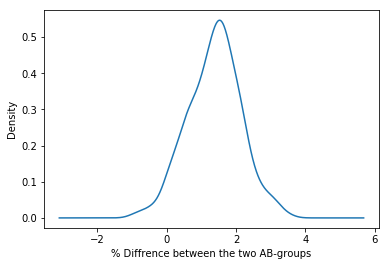

In [19]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40'] ) /boot_1d['gate_40'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.kde()
# ... YOUR CODE FOR TASK 7 ...
ax.set_xlabel('% Diffrence between the two AB-groups')

## 8. The probability of a difference
<p><img src="files/img/ziggy_smiling.png" style="width:200px; float:left"> </p>
<p>From this chart, we can see that the most likely % difference is around 1% - 2%, and that most of the distribution is above 0%, in favor of a gate at level 30. But what is the <em>probability</em> that the difference is above 0%? Let's calculate that as well.</p>

In [20]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])

# Pretty printing the probability
'{:.1%}'.format(prob)

'96.0%'

## 9. 7-day retention by AB-group
<p>The bootstrap analysis tells us that there is a high probability that 1-day retention is better when the gate is at level 30. However, since players have only been playing the game for one day, it is likely that most players haven't reached level 30 yet. That is, many players won't have been affected by the gate, even if it's as early as level 30. </p>
<p>But after having played for a week, more players should have reached level 40, and therefore it makes sense to also look at 7-day retention. That is: What percentage of the people that installed the game also showed up a week later to play the game again.</p>
<p>Let's start by calculating 7-day retention for the two AB-groups.</p>

In [21]:
# Calculating 7-day retention for both AB-groups
df.groupby('version').retention_7.sum()/df.groupby('version').retention_7.count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

## 10.0 Null hypothesis test for 7-day retention

### Calculate the observed 7-day retention difference between gate_30 and gate_40

In [22]:
# calculate the observed 1-dasy retension for AB-group
observed_7_day_retention = df.groupby('version')['retention_7'].mean()
# gate_30 1-day retention
observed_gate_30_day_7_retention = observed_7_day_retention[0]
observed_gate_40_day_7_retention = observed_7_day_retention[1]
# calsulate the observed difference
observed_7_day_difference = observed_gate_30_day_7_retention - observed_gate_40_day_7_retention
print('The observed 7-day retentin difference between gate_30 and gate_40 is', '{}'.format(observed_7_day_difference))

The observed 7-day retentin difference between gate_30 and gate_40 is 0.008201298315205913


### Get gate_30 7-day retetion and gate_40 7_day retetion arrays

In [23]:
# Filter the version column to extract gate_30 7-day retention
gate_30_retention_7 = df.retention_7[df.version == 'gate_30']
# Turn gate_30 1-day retention to numpy array
gate_30_retention_7 = np.array(gate_30_retention_7)

# Filter the version column to extract gate_40 7-day retention
gate_40_retention_7 = df.retention_7[df.version == 'gate_40']
# Turn gate_40 1-day retention to numpy array
gate_40_retention_7 = np.array(gate_40_retention_7)

### Generate Permutaion replicates

In [24]:
# Generate 100000 permutation replicates
perm_replicates_retention_7 = draw_perm_reps(gate_30_retention_7, gate_40_retention_7, diff_frac, size=100000)
print('Generate permutation replicates done!')

Generate permutation replicates done!


### Calculate p-value

In [25]:
p_value_retention_7 = np.sum(perm_replicates_retention_7 >= observed_7_day_difference) / 100000
print(p_value_retention_7)

0.00085


### Conclusion

In this case, the p-value is significant small, we would claim the data are statistically siginficantly different than what we would observe under the null hypothesis. This suggest the gate_30 7-day retention is statistically better than the gate_40 7-day retention.

## 10. Bootstrapping the difference again
<p>Like with 1-day retention, we see that 7-day retention is slightly lower (18.2%) when the gate is at level 40 than when the gate is at level 30 (19.0%). This difference is also larger than for 1-day retention, presumably because more players have had time to hit the first gate. We also see that the <em>overall</em> 7-day retention is lower than the <em>overall</em> 1-day retention; fewer people play a game a week after installing than a day after installing.</p>
<p>But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.</p>

version       gate_30   gate_40
retention_7  0.193147  0.181365
retention_7  0.189350  0.179614
retention_7  0.191171  0.180519
retention_7  0.194721  0.180576
retention_7  0.191670  0.183966


'100.0%'

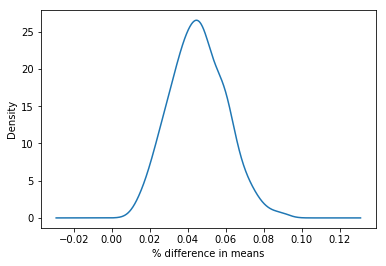

In [26]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version').retention_7.mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)
print(boot_7d.head())

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40'])/boot_7d['gate_40']

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot.kde()
ax.set_xlabel("% difference in means")

# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

# Pretty printing the probability
'{:.1%}'.format(prob)

## 11.  The conclusion
<p>The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should <strong>not</strong> move the gate from level 30 to level 40. There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention <em>is</em> one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.</p>
<p><img src="files/img/cookie_yellow.png" style="width:100px; float:center"> </p>
<p>So, why is retention higher when the gate is positioned earlier? One could expect the opposite: The later the obstacle, the longer people are going to engage with the game. But this is not what the data tells us. The theory of <em>hedonic adaptation</em> can give one explanation for this. In short, hedonic adaptation is the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously. By forcing players to take a break when they reach a gate, their enjoyment of the game is prolonged. But when the gate is moved to level 40, fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it. </p>

In [27]:
# So, given the data and the bootstrap analysis
# Should we move the gate from level 30 to level 40 ?
move_to_level_40 = False # True or False ?